In [1]:
import numpy as np
import matplotlib.pylab as plt
import scipy
from scipy.integrate import quad
import sympy as sp
import plots

In [2]:
nR=100000
nT=6
R0=10
T0=10
R=np.linspace(0,R0,nR)
T=np.linspace(-T0,T0,nT)

In [3]:
Us, Vs =plots.create_penrose_grid(R,T)

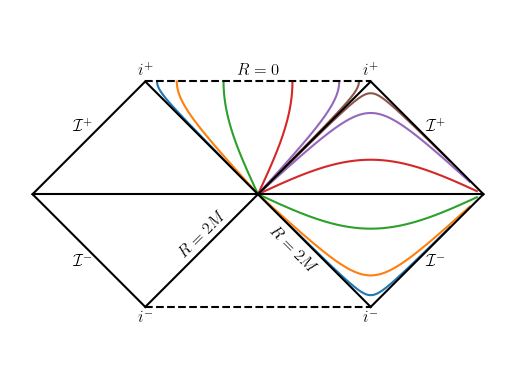

In [4]:
plots.plot_penrose(Us,Vs,T)

In [5]:
#transform to Schwarzschild R from coordinate r via R=rphi^2
def phi(r):
    return 1+1/(2*r)
def RR(r):
    return phi(r)**2*r

In [14]:
r=np.linspace(0.0001,10,nR)
Ui,Vi=plots.create_penrose_grid(RR(r),T)

for i, I in enumerate(r):
    if I<1/2:
        Ui[i]=-Ui[i]

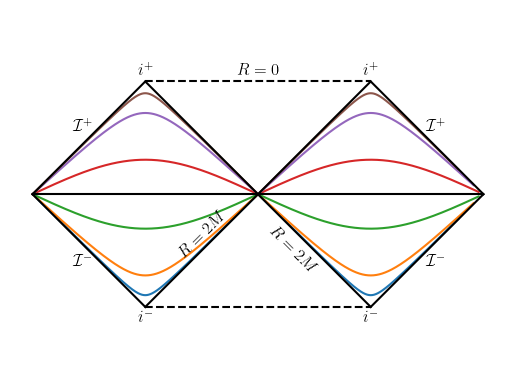

In [18]:
plots.plot_penrose(Ui,Vi,T)

In [8]:
def hanal(r):
    #analytic expression for height function h(r)
    A=(2*r-3)*np.sqrt(4*r**2+4*r+3)
    B=3*np.sqrt(6)*np.arctanh((4*r+3)/(3*np.sqrt(2*r**2+2*r+3/2)))
    C=8*np.arctanh((10*r+7)/(3*np.sqrt(3)*np.sqrt(4*r**2+4*r+3)))

    E=4*np.sqrt(27/r**4-32/r+16)*r**2
    return -A*(B-C)/E

/tmp/ipykernel_1531904/2977112875.py:4: RuntimeWarning: divide by zero encountered in arctanh
  B=3*np.sqrt(6)*np.arctanh((4*r+3)/(3*np.sqrt(2*r**2+2*r+3/2)))
/tmp/ipykernel_1531904/2977112875.py:8: RuntimeWarning: invalid value encountered in multiply
  return -A*(B-C)/E


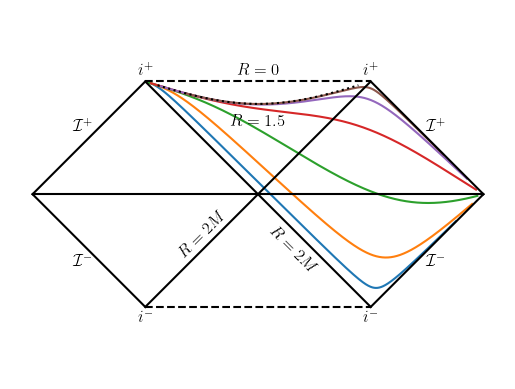

In [9]:
R = np.linspace(3/2,R0,nR) 

R_grid, t_grid = np.meshgrid(R, T, indexing='ij')

#Apply the trumpet coordinate transformation (T = t + h(R)).
T_grid_trumpet = t_grid + hanal(R_grid)
U_trumpet, V_trumpet = plots.schwarzschild_to_penrose(R_grid, T_grid_trumpet)

plots.plot_penrose(U_trumpet, V_trumpet, T, 3/2) #We can add a contour of constant R